# Openslide를 활용해 이미지 띄우기


## Openslide


### Installation ([link](https://openslide.org/api/python/#installing))

-   Linux or MacOS

    1. **Openslide** 설치: Package Manager를 이용하여 설치함
    2. **Openslide Python** 설치: Package Manager 혹은 PIP를 이용하여 설치

    -   1, 2 모두 Package Manager를 이용하는 경우, 동일한 Package Manager를 사용할 것

-   Windows

    1. Windows Binaries를 다운받은 후 원하는 경로에 압축해제
    2. 직접 경로를 지정하여 사용함

    -   `with os.add_dll_directory(r'c:\path\to\openslide-win64\bin')` 내부에서 openslide를 import 함


In [ ]:
SLIDE_FILE_PATH = "/home/onsuo/dev/virtual_microscope/server_project/media/slides/H7050x20 blood vessels human.ndpi"
SlIDE_NAME = "H7050x20 blood vessels human"

### Openslide Object

-   원본 이미지 1장 -> downscale 하여 작은 이미지 생성한 것


In [19]:
%cd /home/onsuo/dev/virtual_microscope

/home/onsuo/dev/virtual_microscope


In [ ]:
from openslide import OpenSlide

print(OpenSlide.detect_format(SLIDE_FILE_PATH))  # classmethod

hamamatsu


In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    for name, value in slide.properties.items():
        print(f"{name:<40} {value}")

hamamatsu.AHEX[0]                        71030C27A5036C1B0C4BA0197027144BA02368270C439C17681F083F980F641B00379809681F004798116027083F9415600B082F9400640F0C33990368230C3F980F6C2110379805702F18539C17742718479C0D78231847A00B781D1C3FA00049AE
hamamatsu.AHEX[0].fluorescence           00170023002F00370047004F0047004F005B0043004300470037003F003F0037002F0037003F003F003F0043003F003F0027002F0027002B003300230047003F003700430037002700570057003F004F004F0033004B004F002F00430047001F0B50
hamamatsu.AHEX[0].ploidy                 69070023940064170843901B68230C4790276023083F9017641B083B8C0F601B002F8C0B641F003F8C115C27083B88175C0B0C2B8800600F102F8D056423103B8C0F681F10338C036C2F184F901770251447900B702314479407701F183F95030964
hamamatsu.AHEX[1]                        7C03182BA803781F1C4BA81B7C2B204FA427742B1C47A41B741F1843A013701F1037A00F70231047A015682B143F9C17681318339C0770131C37A00070271C3FA01374272037A00B78332853A41980292447A40F80272447A80B841F2C3FA8034F2F
hamamatsu.AHEX[1].fluorescence           001B002

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    print("level_count:", slide.level_count)

    print("level_dimensions:")
    for i, value in enumerate(slide.level_dimensions):
        print(f"\t{i:<2} {value}")

    print("level_downsamples:")
    for i, value in enumerate(slide.level_downsamples):
        print(f"\t{i:<2} {value}")

    print("best level for downsampling by a factor of 10:", slide.get_best_level_for_downsample(10))

level_count: 9
level_dimensions:
	0  (19200, 16896)
	1  (9600, 8448)
	2  (4800, 4224)
	3  (2400, 2112)
	4  (1200, 1056)
	5  (600, 528)
	6  (300, 264)
	7  (150, 132)
	8  (75, 66)
level_downsamples:
	0  1.0
	1  2.0
	2  4.0
	3  8.0
	4  16.0
	5  32.0
	6  64.0
	7  128.0
	8  256.0
best level for downsampling by a factor of 16: 4


associated_images:
	macro: <PIL.Image.Image image mode=RGBA size=1145x391 at 0x7FABA1303710>


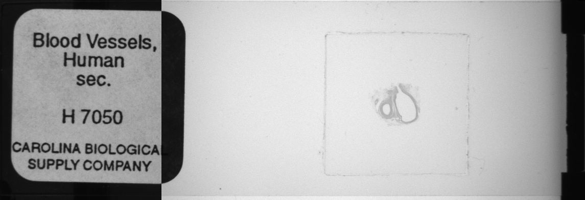

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    print("associated_images:")
    for name, image in slide.associated_images.items():
        print(f"\t{name}:", image)
        width, height = image.size
        ratio = width / height
        new_height = 200
        image.resize((int(new_height * ratio), new_height)).show()

get_thumbnail: <PIL.Image.Image image mode=RGB size=256x225 at 0x7FABA156FA10>


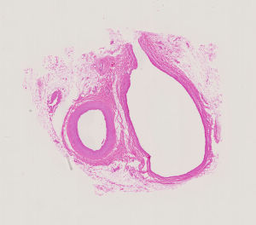

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    thumbnail = slide.get_thumbnail((256, 256))
    print("get_thumbnail:", thumbnail)
    thumbnail.show()

read_region: <PIL.Image.Image image mode=RGBA size=300x300 at 0x7FABA179D150>


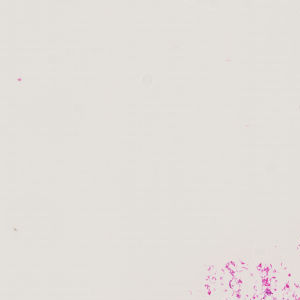

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    region = slide.read_region((0, 0), 4, (300, 300))
    print("read_region:", region)
    region.show()

In [ ]:
from openslide import OpenSlideCache

with OpenSlide(SLIDE_FILE_PATH) as slide:
    slide.set_cache(OpenSlideCache(1024))

### Deep Zoom Support

-   openslide object를 tile로 쪼개서 쉽게 접근할 수 있도록 한 것.


In [ ]:
from openslide import OpenSlide
from openslide.deepzoom import DeepZoomGenerator

with OpenSlide(SLIDE_FILE_PATH) as slide:
    deepzoom = DeepZoomGenerator(slide)  # (tile_size + 2 * overlap)이 2의 거듭제곱이 되도록
    print("level_count:", deepzoom.level_count)

    print("tile_count:", deepzoom.tile_count)

    print("level_tiles")
    for i, value in enumerate(deepzoom.level_tiles):
        print(f"\t{i:<2} {value}")

    print("level_dimensions")
    for i, value in enumerate(deepzoom.level_dimensions):
        print(f"\t{i:<2} {value}")

level_count: 16
tile_count: 6844
level_tiles
	0  (1, 1)
	1  (1, 1)
	2  (1, 1)
	3  (1, 1)
	4  (1, 1)
	5  (1, 1)
	6  (1, 1)
	7  (1, 1)
	8  (1, 1)
	9  (2, 2)
	10 (3, 3)
	11 (5, 5)
	12 (10, 9)
	13 (19, 17)
	14 (38, 34)
	15 (76, 67)
level_dimensions
	0  (1, 1)
	1  (2, 2)
	2  (3, 3)
	3  (5, 5)
	4  (10, 9)
	5  (19, 17)
	6  (38, 33)
	7  (75, 66)
	8  (150, 132)
	9  (300, 264)
	10 (600, 528)
	11 (1200, 1056)
	12 (2400, 2112)
	13 (4800, 4224)
	14 (9600, 8448)
	15 (19200, 16896)


In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    deepzoom = DeepZoomGenerator(slide)
    print("get_dzi:", deepzoom.get_dzi("jpeg"))  # or 'png'
    with open("slide.dzi", "w") as f:
        f.write(deepzoom.get_dzi("jpeg"))

get_dzi: <Image TileSize="254" Overlap="1" Format="jpeg" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Width="19200" Height="16896" /></Image>


get_tile: <PIL.Image.Image image mode=RGB size=256x256 at 0x7FABB2B89190>


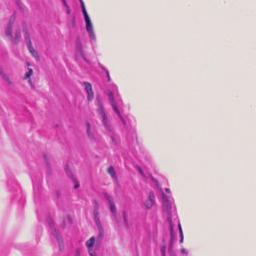

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    deepzoom = DeepZoomGenerator(slide)
    tile = deepzoom.get_tile(15, (40, 40))
    print("get_tile:", tile)
    tile.show()

get_tile_coordinates: ((10159, 10159), 0, (256, 256))
read_region by coordinates: <PIL.Image.Image image mode=RGBA size=256x256 at 0x7FABA156FB50>


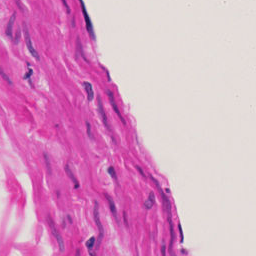

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    deepzoom = DeepZoomGenerator(slide)
    coord = deepzoom.get_tile_coordinates(15, (40, 40))
    print("get_tile_coordinates:", coord)

    region = slide.read_region(*coord)
    print("read_region by coordinates:", region)
    region.show()

In [ ]:
with OpenSlide(SLIDE_FILE_PATH) as slide:
    deepzoom = DeepZoomGenerator(slide)
    # tile 1개 크기
    print("get_tile_dimensions:", deepzoom.get_tile_dimensions(15, (40, 40)))
    print("get_tile_dimensions:", deepzoom.get_tile_dimensions(8, (0, 0)))
    print("get_tile_dimensions:", deepzoom.get_tile_dimensions(4, (0, 0)))

get_tile_dimensions: (256, 256)
get_tile_dimensions: (150, 132)
get_tile_dimensions: (10, 9)


## Web


### Web Application

-   Web Server -- NGINX
-   Web Application Server (WAS) -- Django
-   Database Server (DB) -- MySQL

Client <-> Web Server <-> WAS <-> DB


### Installation

NGINX - uWSGI - Django : [Setup Guide](https://uwsgi-docs.readthedocs.io/en/latest/tutorials/Django_and_nginx.html)

-   NGINX
    -   apt install nginx
-   uWSGI: NGINX, Django 연결
    -   conda install uwsgi (테스트용)
    -   실 사용을 위해서는 전역 설치가 권장됨. (nginx의 www-data가 가지는 접근권한을 주기 위함인 듯..?)
-   Django
    -   conda install Django


### WSL2를 통한 서버 운영

1. 외부IP:포트 -> 내부IP:포트 -> WSL2가상IP:포트

    - 외부 -> 내부 포트포워딩, 방화벽 해제
    - 내부 -> WSL2 포트포워딩, 방화벽 해제

2. WSL2가상IP:포트 -> web server


#### Django 초기 세팅


In [ ]:
import django

print(django.get_version())

5.1


In [26]:
%cd /home/onsuo/dev/virtual_microscope
! mkdir server_project
! django-admin startproject config server_project

/home/onsuo/dev/virtual_microscope


In [34]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! python manage.py -h

/home/onsuo/dev/virtual_microscope/server_project

Type 'manage.py help <subcommand>' for help on a specific subcommand.

Available subcommands:

[auth]
    changepassword
    createsuperuser

[contenttypes]
    remove_stale_contenttypes

[django]
    check
    compilemessages
    createcachetable
    dbshell
    diffsettings
    dumpdata
    flush
    inspectdb
    loaddata
    makemessages
    makemigrations
    migrate
    optimizemigration
    sendtestemail
    shell
    showmigrations
    sqlflush
    sqlmigrate
    sqlsequencereset
    squashmigrations
    startapp
    startproject
    test
    testserver

[sessions]
    clearsessions

[staticfiles]
    collectstatic
    findstatic
    runserver


In [35]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! python manage.py makemigrations --noinput
! python manage.py migrate

/home/onsuo/dev/virtual_microscope/server_project
No changes detected
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions, viewer
Running migrations:
  No migrations to apply.


In [27]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! mkdir apps
%cd apps
! django-admin startapp viewer

/home/onsuo/dev/virtual_microscope/server_project
/home/onsuo/dev/virtual_microscope/server_project/apps


In [66]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! python manage.py collectstatic --noinput

/home/onsuo/dev/virtual_microscope/server_project
Found another file with the destination path 'viewer/openseadragon/changelog.txt'. It will be ignored since only the first encountered file is collected. If this is not what you want, make sure every static file has a unique path.
Found another file with the destination path 'viewer/openseadragon/openseadragon.min.js'. It will be ignored since only the first encountered file is collected. If this is not what you want, make sure every static file has a unique path.
Found another file with the destination path 'viewer/openseadragon/openseadragon.js'. It will be ignored since only the first encountered file is collected. If this is not what you want, make sure every static file has a unique path.
Found another file with the destination path 'viewer/openseadragon/openseadragon.js.map'. It will be ignored since only the first encountered file is collected. If this is not what you want, make sure every static file has a unique path.
Found ano

#### client <-> Django <-> Python

-   기능 개발용으로는 Django 자체 서버를 이용해도 충분함


In [36]:
%cd /home/onsuo/dev/virtual_microscope/server_project
# %cd /home/onsuo/dev/virtual_microscope/dayoung
! python manage.py runserver 0.0.0.0:8080

/home/onsuo/dev/virtual_microscope/server_project
Watching for file changes with StatReloader
Performing system checks...

System check identified no issues (0 silenced).
November 19, 2024 - 13:05:37
Django version 5.1, using settings 'config.settings'
Starting development server at http://0.0.0.0:8080/
Quit the server with CONTROL-C.

[19/Nov/2024 13:05:39] "GET /admin/viewer/slide/1/change/?_changelist_filters=q%3D HTTP/1.1" 200 11457
[19/Nov/2024 13:05:39] "GET /admin/jsi18n/ HTTP/1.1" 200 3342
Not Found: /media/slides/H7050x20_blood_vessels_human.ndpi
[19/Nov/2024 13:05:47] "GET /media/slides/H7050x20_blood_vessels_human.ndpi HTTP/1.1" 404 2463
[19/Nov/2024 13:05:48] "GET /admin/viewer/slide/1/change/?_changelist_filters=q%3D HTTP/1.1" 200 11457
[19/Nov/2024 13:05:52] "GET /admin/viewer/slide/?q= HTTP/1.1" 200 11219
^C


#### client <-> uWSGI <-> Python


In [ ]:
# test.py
"""
def application(env, start_response):
    start_response('200 OK', [('Content-Type', 'text/html')])
    return [b'Hello World']
"""

In [101]:
! uwsgi --http :8400 --wsgi-file test.py

*** Starting uWSGI 2.0.21 (64bit) on [Sun Oct 27 21:02:28 2024] ***
compiled with version: 11.2.0 on 05 August 2024 19:33:08
os: Linux-5.15.153.1-microsoft-standard-WSL2 #1 SMP Fri Mar 29 23:14:13 UTC 2024
nodename: Laptop
machine: x86_64
clock source: unix
pcre jit disabled
detected number of CPU cores: 4
current working directory: /home/onsuo/dev/virtual_microscope/vscope_server
detected binary path: /home/onsuo/miniconda3/envs/vscope/bin/uwsgi
*** WARNING: you are running uWSGI without its master process manager ***
your processes number limit is 15656
your memory page size is 4096 bytes
detected max file descriptor number: 1048576
lock engine: pthread robust mutexes
thunder lock: disabled (you can enable it with --thunder-lock)
uWSGI http bound on :8400 fd 4
spawned uWSGI http 1 (pid: 72829)
uwsgi socket 0 bound to TCP address 127.0.0.1:45751 (port auto-assigned) fd 3
Python version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
*** Python threads support is disabled. You can e

#### client <-> uWSGI <-> Django <-> Python


In [69]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! uwsgi --http :8400 --module config.wsgi

/home/onsuo/dev/virtual_microscope/server_project
*** Starting uWSGI 2.0.21 (64bit) on [Sun Nov 10 22:20:18 2024] ***
compiled with version: 11.2.0 on 05 August 2024 19:33:08
os: Linux-5.15.153.1-microsoft-standard-WSL2 #1 SMP Fri Mar 29 23:14:13 UTC 2024
nodename: Laptop
machine: x86_64
clock source: unix
pcre jit disabled
detected number of CPU cores: 4
current working directory: /home/onsuo/dev/virtual_microscope/server_project
detected binary path: /home/onsuo/miniconda3/envs/vscope/bin/uwsgi
*** WARNING: you are running uWSGI without its master process manager ***
your processes number limit is 15656
your memory page size is 4096 bytes
detected max file descriptor number: 1048576
lock engine: pthread robust mutexes
thunder lock: disabled (you can enable it with --thunder-lock)
uWSGI http bound on :8400 fd 4
spawned uWSGI http 1 (pid: 35755)
uwsgi socket 0 bound to TCP address 127.0.0.1:33055 (port auto-assigned) fd 3
Python version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0

#### client <-> NGINX <-> socket <-> uWSGI <-> Django <-> Python


In [ ]:
# /etc/nginx/sites-available/mysite_nginx.conf
"""
# the upstream component nginx needs to connect to
upstream django {
    # server unix:///path/to/your/mysite/mysite.sock; # for a file socket
    server 127.0.0.1:8001;
}

# configuration of the server
server {
    # the port your site will be served on
    listen      8000;
    # the domain name it will serve for
    server_name 0.0.0.0;
    charset     utf-8;

    # max upload size
    client_max_body_size 75M;

    # Django media
    location /media/  {
        alias /home/onsuo/dev/virtual_microscope/server_project/media/;
    }

    location /static/ {
        alias /home/onsuo/dev/virtual_microscope/server_project/static/;
    }

    # Finally, send all non-media requests to the Django server.
    location / {
        uwsgi_pass  django;
        include     /home/onsuo/dev/virtual_microscope/server_project/uwsgi_params;
    }
}
"""

# uWSGI 전역 설치 전까지는 nginx.conf의 'user www-data'를 'user <myuser>'로 바꿔두기

In [60]:
# symbolic-link
! echo 'onsuo' | sudo -S ln -s /etc/nginx/sites-available/virtual_microscope.conf /etc/nginx/sites-enabled/

[sudo] password for onsuo: 

In [1]:
! echo 'onsuo' | sudo -S systemctl restart nginx

[sudo] password for onsuo: 

In [2]:
%cd /home/onsuo/dev/virtual_microscope/server_project
! uwsgi --socket :8001 --module config.wsgi  # using port

/home/onsuo/dev/virtual_microscope/server_project
*** Starting uWSGI 2.0.21 (64bit) on [Tue Nov 19 21:15:06 2024] ***
compiled with version: 11.2.0 on 05 August 2024 19:33:08
os: Linux-5.15.167.4-microsoft-standard-WSL2 #1 SMP Tue Nov 5 00:21:55 UTC 2024
nodename: Laptop
machine: x86_64
clock source: unix
pcre jit disabled
detected number of CPU cores: 4
current working directory: /home/onsuo/dev/virtual_microscope/server_project
detected binary path: /home/onsuo/miniconda3/envs/vscope/bin/uwsgi
*** WARNING: you are running uWSGI without its master process manager ***
your processes number limit is 15656
your memory page size is 4096 bytes
detected max file descriptor number: 1048576
lock engine: pthread robust mutexes
thunder lock: disabled (you can enable it with --thunder-lock)
uwsgi socket 0 bound to TCP address :8001 fd 3
Python version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
*** Python threads support is disabled. You can enable it with --enable-threads ***
Python main

In [3]:
! echo 'onsuo' | sudo -S systemctl stop nginx

[sudo] password for onsuo: 